# Support Vector Machine for Classification - Iris Dataset

In [83]:
%matplotlib inline

import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [84]:
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [85]:
X = iris.data[:, :2] # take the first two features
y = iris.target

In [86]:
h = .02  # step size in the mesh
C = 1.0  # SVM regularization parameter

## SVC with linear kernel

In [87]:
# create an instance of SVM and fit the data. Data is not scaled
# since we want to plot the support vectors
std_svc = svm.SVC(kernel='linear', C=C).fit(X, y)

In [88]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

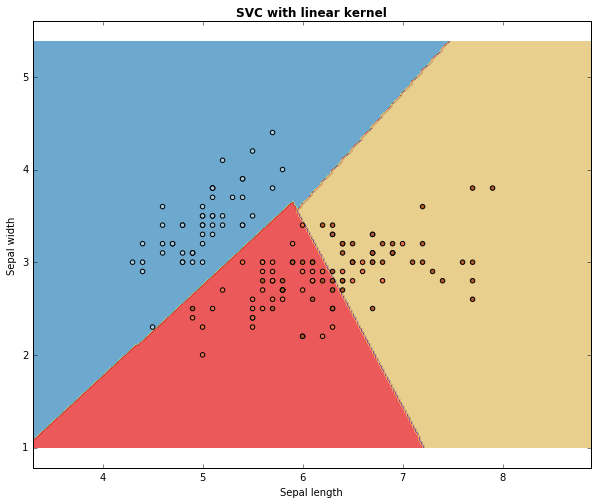

In [89]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 1, 1)
Z = std_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel', {'fontsize': 12, 'fontweight': 'bold', 'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})
plt.show()

## LinearSVC (linear kernel)

In [90]:
lin_svc = svm.LinearSVC(C=C).fit(X, y)

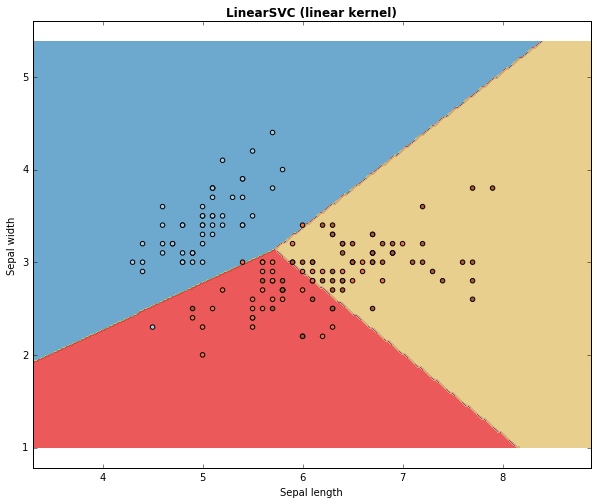

In [91]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 1, 1)
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('LinearSVC (linear kernel)', {'fontsize': 12, 'fontweight': 'bold', 'verticalalignment': 'baseline',
                                        'horizontalalignment': 'center'})
plt.show()

## SVC with RBF kernel

In [92]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

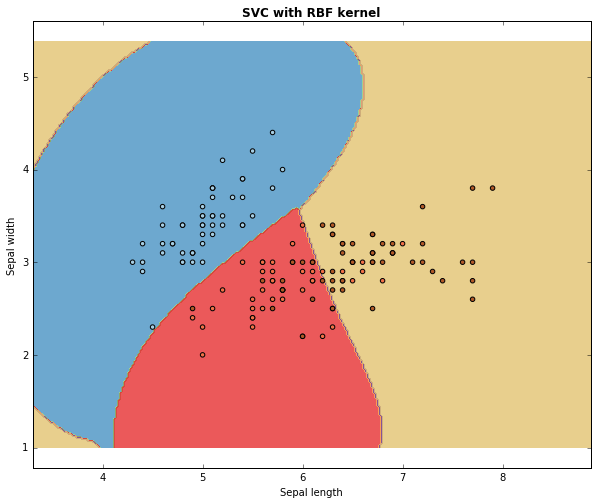

In [93]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 1, 1)
Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel', {'fontsize': 12, 'fontweight': 'bold', 'verticalalignment': 'baseline',
                                  'horizontalalignment': 'center'})
plt.show()

## SVC with polynomial (degree 3) kernel

In [94]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

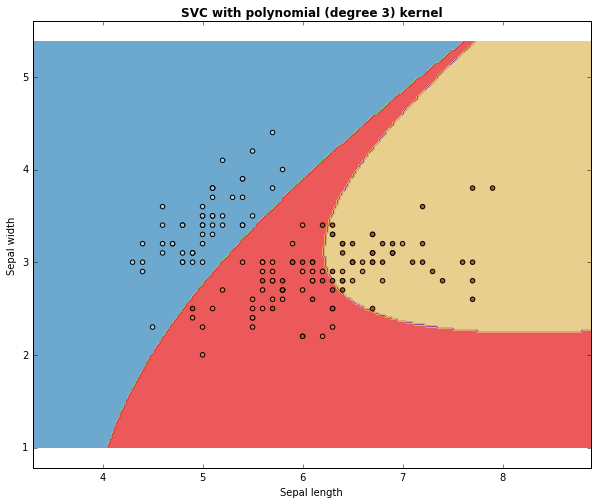

In [95]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 1, 1)
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial (degree 3) kernel', {'fontsize': 12, 'fontweight': 'bold', 'verticalalignment': 'baseline',
                                                    'horizontalalignment': 'center'})
plt.show()

## Tuning $\gamma$ parameter

In [96]:
g = [1, 10, 50, 100]
titles = ['$\gamma$ = 1', '$\gamma$ = 10', '$\gamma$ = 50', '$\gamma$ = 100']

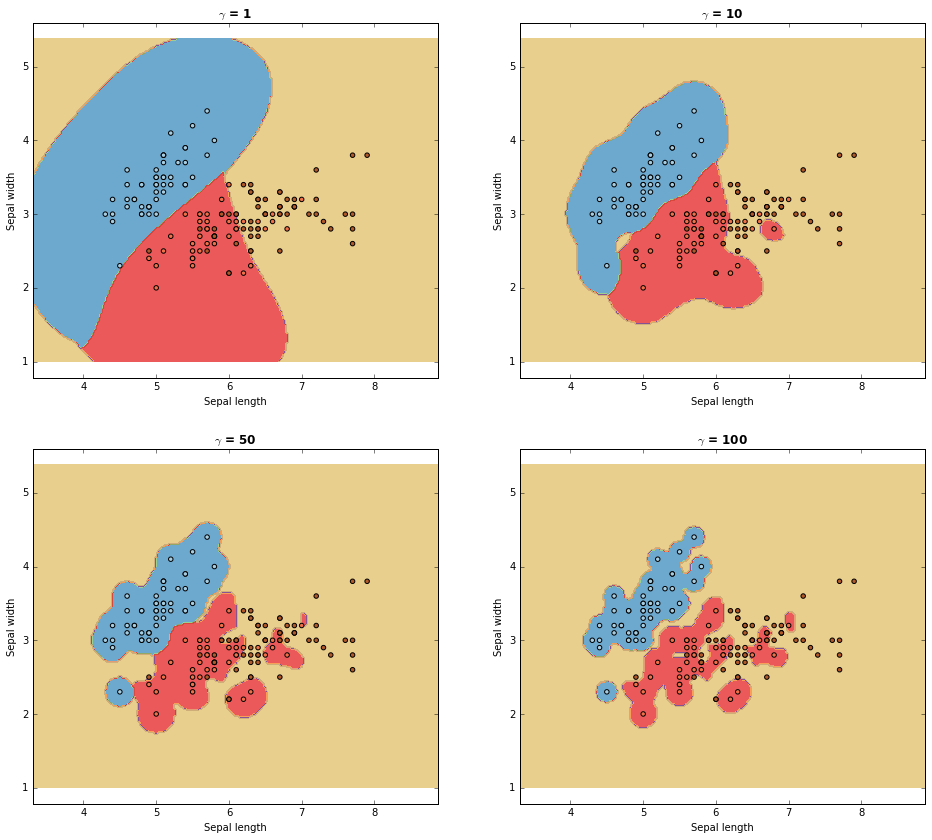

In [97]:
plt.figure(figsize=(16, 14))

for i in range(0, 4):

    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    rbf_svc = svm.SVC(kernel='rbf', gamma=g[i], C=C).fit(X, y)
    Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(titles[i], {'fontsize': 12, 'fontweight': 'bold', 'verticalalignment': 'baseline',
                          'horizontalalignment': 'center'})

plt.show()